In [2]:
# importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from scipy.stats import norm

# fetching data
import yfinance as yf

#for plotting the data 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab
from tabulate import tabulate

In [17]:
stocks = ['BND', 'SPY', 'GLD', 'QQQ', 'VTI' ]
years = 10
endDate = dt.datetime.now()
startDate = endDate- dt.timedelta(days = 365*years)
adj_close_stock = yf.download(stocks, start=startDate, end=endDate)['Adj Close']

print(adj_close_stock)

[*********************100%***********************]  5 of 5 completed

Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2014-12-26  62.569443  114.830002   97.365326  175.121780   90.671028
2014-12-29  62.676105  113.669998   97.346764  175.356964   90.865265
2014-12-30  62.721836  115.199997   96.697929  174.416031   90.417648
2014-12-31  62.767563  113.580002   95.706108  172.685287   89.522430
2015-01-02  62.980923  114.080002   95.418762  172.592834   89.454834
...               ...         ...         ...         ...         ...
2024-12-16  72.750000  244.880005  538.169983  604.754578  301.149994
2024-12-17  72.760002  243.940002  535.799988  602.262939  299.660004
2024-12-18  72.190002  239.259995  516.469971  584.313416  290.390015
2024-12-19  71.989998  239.600006  514.169983  584.133972  289.980011
2024-12-20  72.209999  242.100006  518.659973  591.150024  293.279999

[2514 rows x 5 columns]


In [18]:
# calculating Daily Log Returns and droppingNAs
log_returns = np.log(adj_close_stock/ adj_close_stock.shift(1))
log_returns =log_returns.dropna()
print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2014-12-29  0.001703 -0.010153 -0.000191  0.001342  0.002140
2014-12-30  0.000729  0.013370 -0.006687 -0.005380 -0.004938
2014-12-31  0.000729 -0.014162 -0.010310 -0.009973 -0.009950
2015-01-02  0.003393  0.004393 -0.003007 -0.000536 -0.000755
2015-01-05  0.002899  0.014965 -0.014777 -0.018225 -0.017332
...              ...       ...       ...       ...       ...
2024-12-16  0.001100  0.002412  0.014298  0.004261  0.004059
2024-12-17  0.000137 -0.003846 -0.004414 -0.004129 -0.004960
2024-12-18 -0.007865 -0.019371 -0.036744 -0.030257 -0.031424
2024-12-19 -0.002774  0.001420 -0.004463 -0.000307 -0.001413
2024-12-20  0.003051  0.010380  0.008695  0.011939  0.011316

[2513 rows x 5 columns]


In [19]:
# Creating an Equally Weighted Portfolio
portfolio_value = 100000
weights = np.array([1/len(stocks)]*len(stocks))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [21]:
#Calculating Historical Returns 
historical_returns = (log_returns*weights).sum(axis=1)
print(historical_returns)

day = 50

range_returns = historical_returns.rolling(window = day).sum()
range_returns = range_returns.dropna()
print(range_returns)
print(range_returns.sort_values())

Date
2014-12-29   -0.001032
2014-12-30   -0.000581
2014-12-31   -0.008733
2015-01-02    0.000698
2015-01-05   -0.006494
                ...   
2024-12-16    0.005226
2024-12-17   -0.003442
2024-12-18   -0.025132
2024-12-19   -0.001508
2024-12-20    0.009076
Length: 2513, dtype: float64
Date
2015-03-11   -0.011148
2015-03-12   -0.003700
2015-03-13   -0.006245
2015-03-16    0.010462
2015-03-17    0.008182
                ...   
2024-12-16    0.041248
2024-12-17    0.044882
2024-12-18    0.014408
2024-12-19    0.010196
2024-12-20    0.018883
Length: 2464, dtype: float64
Date
2020-03-23   -0.202675
2020-03-20   -0.201500
2020-03-19   -0.180975
2020-03-18   -0.180573
2020-03-16   -0.173366
                ...   
2020-05-27    0.193743
2020-05-29    0.203577
2020-06-01    0.207936
2020-06-02    0.230084
2020-06-03    0.230324
Length: 2464, dtype: float64


In [26]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns, 100- (confidence_interval*100))
VaR


0.12065469190051077

In [27]:
VaR= VaR*portfolio_value
print(VaR)

12065.469190051077


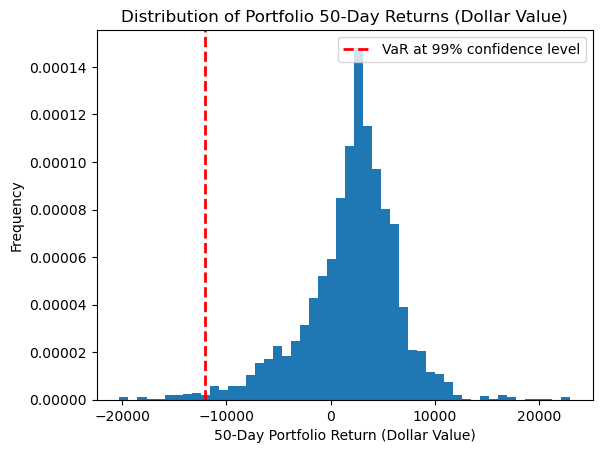

In [28]:
return_window = day
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

0.0650206928629353
6502.069286293529


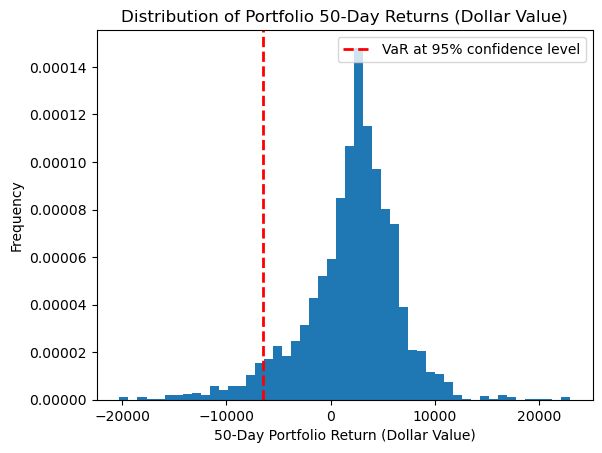

In [29]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100- (confidence_interval*100))
print(VaR)
VaR= VaR*portfolio_value
print(VaR)
return_window = day
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

In [35]:
#the final output
print("The VaR at 99% C.I is" , round(12065.469190051077,2) )
print("The VaR at 95% C.I is" , round(6502.069286293529,2) )


The VaR at 99% C.I is 12065.47
The VaR at 95% C.I is 6502.07
